

# Investigating TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Welcome to the analysis of TMDB Movies dataset. 
  This dataset contains data about the movies released between 1960 and 2015. Let's explore the dataset and try to come up with   answers for the below questions! 
  
  1. Which movie genre makes highest revenue?
  2. Which director's movies make more business on an average?
  3. Top 5 highest rated movies by the audience.
  4. Is movie budget increasing over time and does budget of the movie directly impacts it's business?
  5. Which production house is most successful?
  6. What is the average vote of the movies?

In [1]:
# Packages required to make analysis are imported below

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

  In this step, data is read from the source file (tmdb_data.csv).


In [2]:
#Data is loaded into df using read_csv methodis 
df=pd.read_csv('tmdb_movies.csv')

In [3]:
#Let's take a look at the data available
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning
     Here, errant and the null values are cleaned to make our analysis more accurate and easy.

In [4]:
#Let's look if the data collected has null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

    From, above we can see that there are many null values present. We need to eliminate these values else they will lead to wrong results. 
    
    Columns homepage,tagline,keywords,overview,cast,budget_adj,revenue_adj,vote_count,runtime will not help in answering questions posted in the introduction section. Hence, are deleted.

In [5]:
#columns not affecting analysis are deleted

columns=['homepage','tagline','keywords','overview','cast','budget_adj','revenue_adj','vote_count','runtime']
df.drop(columns,axis=1,inplace=True)
df.shape

(10866, 12)

Now, rows where director and genre columns containing null values will be deleted using dropna() method

In [6]:
df.dropna(subset=['director','genres'],inplace=True)

In [7]:
df.isnull().sum()

id                        0
imdb_id                   5
popularity                0
budget                    0
revenue                   0
original_title            0
director                  0
genres                    0
production_companies    994
release_date              0
vote_average              0
release_year              0
dtype: int64

Although, columns imdb_id and production_companies contain null values, it will not impact the analysis.
**Note** For ansering the question "Which production house does highest business?" the rows conatining null values will be dropped. Dropping all rows conating NaN for production companies column will definitely lead to wrong results as they sum upto ~10% of the total data.

In [8]:
#Check if there are duplicate values
df.duplicated().sum()

1

In [9]:
#Dropping duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Let's do the same for 'production_companies' column.

In [10]:
df_genres = df.copy()
s = df_genres['genres'].str.split('|').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del df_genres['genres']
df_split_genres = df_genres.join(s)
# Check results
df_split_genres.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,production_companies,release_date,vote_average,release_year,genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,Action


Let's do the same for 'production_companies' column.

In [11]:
df_prod = df_split_genres.copy()
s = df_prod['production_companies'].str.split('|').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'production_companies'
del df_prod['production_companies']
df_split_prod = df_prod.join(s)
# Check results
df_split_prod.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,release_date,vote_average,release_year,genres,production_companies
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,6/9/15,6.5,2015,Action,Universal Studios
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,6/9/15,6.5,2015,Action,Amblin Entertainment
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,6/9/15,6.5,2015,Action,Legendary Pictures
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,6/9/15,6.5,2015,Action,Fuji Television Network
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,6/9/15,6.5,2015,Action,Dentsu


In [12]:
#Copying modified dataframe to df
df=df_split_prod.copy()
df.duplicated().sum()

119887

In [13]:
#There are duplicate rows created while splitting genres and production_companies columns. Dropping duplicate rows.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
(df.revenue==0).sum()

27541

In [15]:
#Replacing zero values with NaN in revenue,budget columns to avoid getting wrong results
df.replace({'revenue':0,'budget':0},np.NaN,inplace=True)
print((df.budget==0).sum())
print((df.revenue==0).sum())

0
0


<a id='eda'></a>
## Exploratory Data Analysis

    Now that we've trimmed and cleaned your data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### 1.Which movie genre makes highest revenue?

Below is the plot of Average revenue against Movie genres.

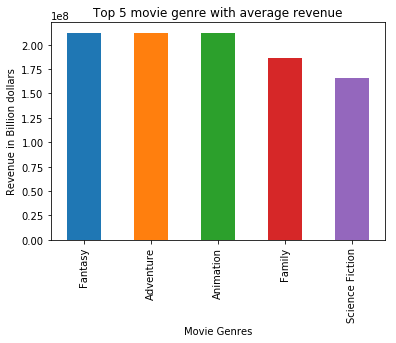

In [17]:
genre_rev=df.groupby('genres')['revenue'].mean()
ax=genre_rev.nlargest(5).plot(kind='bar',title='Top 5 movie genre with average revenue');
ax.set_xlabel('Movie Genres');
ax.set_ylabel('Revenue in Billion dollars');